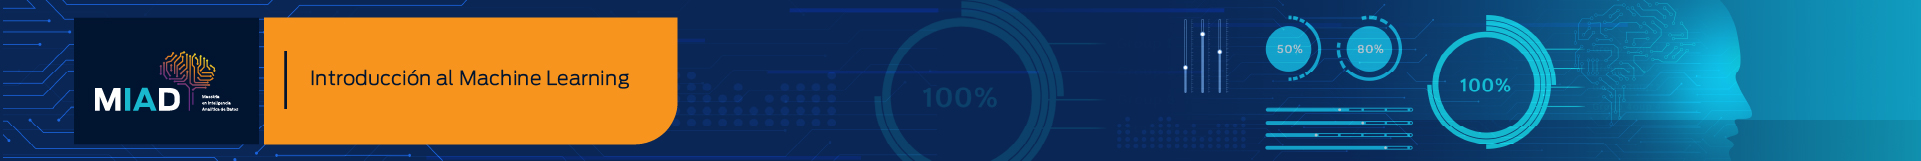

# Introducción al Machine Learning - Semana 5

## Proyecto final entrega 1 - Grupo 2

- Daniel Hoyos Ospina
- Johan Alberto Medina Cetina
- Jose Adrian Martinez Trejo
- Claudia Marcela Baquero Rico

### Cancelación de Reservas en Hoteles

### 1. Formulación de una pregunta de interés enmarcada en el negocio. 

 La evolución de la tecnología y las opciones de reserva en línea han transformado la forma en que los clientes reservan alojamiento en hoteles. No obstante, muchas reservas son canceladas por razones como cambios de planes o conflictos de programación. Si bien es cierto que la opción de cancelación gratuita o a bajo costo es beneficiosa para los huéspedes, esto puede representar un desafío para los hoteles, ya que las cancelaciones pueden resultar en una disminución de ingresos. Por lo tanto, los hoteles deben encontrar un equilibrio entre ofrecer opciones flexibles de reserva y gestionar eficazmente la tasa de cancelaciones para maximizar sus ingresos y garantizar la satisfacción del cliente.

Dado lo anterior el negocio se encuentra interesado en saber: **¿Cómo los atributos comerciales de la reserva pueden predecir las cancelaciones del hotel con el objetivo de asegurar los ingresos del hotel?**


### Datos

En esta ocasión se usará una base de datos disponible en la página Sciencedirect.com. Esta base de datos corresponde a una base comercial de "Reservas" de hotel de una ciudad (H2); estrucutada con 31 variables y describe 79.330 observaciones; de un periodo de reservas del 1-07-2015 y 31-08-2017 que incluye reservas canceladas por los clientes; los datos reflejan que la problemática presentada en el presente contexto es alta puesto que en la base casí la mitad de las Reservas realizadas por los diferetes clientes son canceladas anticipadamente.

Se procede a realizar el análisis de la información detectando una primera suposición sobre la eficiencia en las reservas y las implicaciones para los Hoteles puesto que se corre un riesgo muy alto en perder dinero, arriesgar inversiones o sencillamente afectar el flujo de caja por el desgaste operativo, administrativo y económmico con el que se podrá contar con sólo un __50%__ de efectividad en la ocupación de sus instalaciones.

De esta manera, el objetivo de la actividad es predecir si la reserva será cancelada o no. La base de datos se puede descargar en el siguiente enlace: https://www.sciencedirect.com/science/article/pii/S2352340918315191#t0005

##### RETROALIMENTACION PREGUNTA DE INTERES ENMARCADA EN EL NEGOCIO: 

Comentarios sobre la formulación de una pregunta de interés enmarcada en el negocio: Se define el contexto organizacional donde toman lugar los datos del proyecto y se establece de manera clara y precisa la pregunta de interés que se espera solucionar con el uso de modelos predictivos. 

Bien. Es una tema interesante y relevante. Quizá pensando en la entrega final destacaría algunas estadísticas que resalten la problemática (porcentaje de cancelaciones o algo por el estilo).

###  2. Exploración de los datos para su entendimiento dentro del contexto organizacional. 

Se utilizan histogramas, correlogramas y estadísticas descriptivas para la exploración preliminar de los datos del problema, para dejar claro el rol que cumple cada una de las variables a utilizar dentro del contexto organizacional en cuestión. Además, se argumenta la razón por la que el uso de estas variables puede contribuir a la solución del problema por medio de modelos predictivos. 

In [1]:
#### Utilicen este espacio para escribir los códigos del procedimiento del punto 1 ####

# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')
#from dython import nominal
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Modelado
# ==============================================================================
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from xgboost import XGBClassifier


# Lectura,descripción de datos y eliminación de los que tienen NaN en la variable dependiente
# ==============================================================================
data = "./H2.csv"
data = pd.read_csv(data) 
print(data.columns)
data.head()

Index(['IsCanceled', 'LeadTime', 'ArrivalDateYear', 'ArrivalDateMonth',
       'ArrivalDateWeekNumber', 'ArrivalDateDayOfMonth',
       'StaysInWeekendNights', 'StaysInWeekNights', 'Adults', 'Children',
       'Babies', 'Meal', 'Country', 'MarketSegment', 'DistributionChannel',
       'IsRepeatedGuest', 'PreviousCancellations',
       'PreviousBookingsNotCanceled', 'ReservedRoomType', 'AssignedRoomType',
       'BookingChanges', 'DepositType', 'Agent', 'Company',
       'DaysInWaitingList', 'CustomerType', 'ADR', 'RequiredCarParkingSpaces',
       'TotalOfSpecialRequests', 'ReservationStatus', 'ReservationStatusDate'],
      dtype='object')


,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.0,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.0,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.5,0,1,Canceled,2015-04-02


In [2]:
rows = len(data.axes[0]) 
cols = len(data.axes[1])   

print('\033[1m' +"Las dimensiones de los datos trabajados son:"+'\033[0m')
print("Number of Rows: " + str(rows)) 
print("Number of Columns: " + str(cols)) 
print(" ")
print('\033[1m' +"Las columnas y tipos de los datos:"+'\033[0m')
print(data.dtypes)

faltantotal= data.isnull().sum().sum()
miss_values_count = data.isnull().sum(min_count=1)
miss_values_count = round((miss_values_count[miss_values_count != 0]/len(data.axes[0] ))*100,4)
print(" ")
print('\033[1m'+f"Número de columnas con datos faltantes: {miss_values_count.shape[0]}"+'\033[0m')
if miss_values_count.shape[0]:
    print(f"El total de datos faltantes es de : {faltantotal}")
    print("Recuento de porcentaje nulos por columna: ")
    for name, miss_vals in miss_values_count.items():
        p = miss_vals > 1
        datosfaltante=round((miss_vals/100)*rows,0)
        print(f"  - A la columna '{name}' le falta{'n' if p else ''} "
              f"{miss_vals} % dato{'s' if p else ''},"f"correspondiente a {datosfaltante} datos.")

Las dimensiones de los datos trabajados son:
Number of Rows: 79330
Number of Columns: 31
 
Las columnas y tipos de los datos:
IsCanceled                       int64
LeadTime                         int64
ArrivalDateYear                  int64
ArrivalDateMonth                object
ArrivalDateWeekNumber            int64
ArrivalDateDayOfMonth            int64
StaysInWeekendNights             int64
StaysInWeekNights                int64
Adults                           int64
Children                       float64
Babies                           int64
Meal                            object
Country                         object
MarketSegment                   object
DistributionChannel             object
IsRepeatedGuest                  int64
PreviousCancellations            int64
PreviousBookingsNotCanceled      int64
ReservedRoomType                object
AssignedRoomType                object
BookingChanges                   int64
DepositType                     object
Agent           

In [3]:
print("Faltantes en la variable Agent ", data['Agent'].value_counts()['       NULL'])
print("Faltantes en la variable Company ", data['Company'].value_counts()['       NULL'])

Faltantes en la variable Agent  8131
Faltantes en la variable Company  75641


A pesar de que la cuenta de faltantes inicial indica que apenas hay dos columnas con datos faltantes, se evidencia que son muy pocos vs la realidad en donde desde al inspeccionar columnas como "Agent" y "Company" en el dataset ya nos intuye que hay problemas en el casteo de los datos faltantes. En otras palabras, podemos ver que en estas columnas por ejemplo, hay registros con muchos faltantes, pero, aparecen como variable tipo texto: '       NULL'.

Adicionalmente, evidenciamos en los tipos de datos que las fechas se están tomando como tipo Texto u object y no Fecha o Datetime.

In [4]:
#data["IsCanceled"] = data["IsCanceled"].astype(str)
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns.to_list()
columnas_categoric = data.select_dtypes(exclude=['float64', 'int64']).columns.to_list()
for col in list(columnas_categoric):
    value =len(set(data[col]))
    print(f"Los valores únicos de la variable \033[1m {col} \033[0m son : \033[94m{value}\033[0m")

Los valores únicos de la variable  ArrivalDateMonth  son : 12
Los valores únicos de la variable  Meal  son : 4
Los valores únicos de la variable  Country  son : 167
Los valores únicos de la variable  MarketSegment  son : 8
Los valores únicos de la variable  DistributionChannel  son : 5
Los valores únicos de la variable  ReservedRoomType  son : 8
Los valores únicos de la variable  AssignedRoomType  son : 9
Los valores únicos de la variable  DepositType  son : 3
Los valores únicos de la variable  Agent  son : 224
Los valores únicos de la variable  Company  son : 208
Los valores únicos de la variable  CustomerType  son : 4
Los valores únicos de la variable  ReservationStatus  son : 3
Los valores únicos de la variable  ReservationStatusDate  son : 864


## Profundización del Dataset

El dataset trabajado incluye variables de los atriburtos de los clientes, de las condiciones de la reserva misma y algunos indicadores calculados de acuerdo con las condiciones solicitadas durante la solicitud de una habitación.

A continuación se presentan las variables presentes en el Dataset analizado y su descripción.


1. ADR_ADR: __Numérico_Tasa diaria promedio según lo definido por BO, BL y TR / Calculado dividiendo la suma de todas las transacciones de alojamiento por el número total de noches de estadía

2. Adults_Adultos: __Entero_Número de Adultos	BO y BL

3. Agent_Agente: __Categórico_ID de la agencia de viajes que realizó la reserva BO y BL

4. ArrivalDateDayOfMonth_LlegadaFechaDíaDelMes_Entero: __Día del mes de la fecha de llegada	BO y BL

5. ArrivalDateMonth_LlegadaFechaMes: __Categórico_Mes de fecha de llegada con 12 categorías: “Enero” a “Diciembre”	BO y BL

6. ArrivalDateWeekNumber_LlegadaFechaSemanaNúmero: __Entero	Número de semana de la fecha de llegada	BO y BL

7. ArrivalDateYear_LlegadaFechaAño:	__Entero Año de la fecha de llegada	BO y BL

8. AssignedRoomType	_Tipo de habitación asignado: __Categórico	Código del tipo de habitación asignado a la reserva. En ocasiones, el tipo de habitación asignado difiere del tipo de habitación reservado debido a razones de funcionamiento del hotel (por ejemplo, overbooking) o por solicitud del cliente. Se presenta el código en lugar de la designación por razones de anonimato	BO y BL

9. Babies_Bebés: __Entero	Número de bebés	BO y BL

10. BookingChanges_ReservaCambios:	__Entero	Número de cambios/modificaciones realizados en la reserva desde el momento en que se ingresa la reserva en el PMS hasta el momento del check-in o la cancelación	BO y BL/Calculado sumando el número de iteraciones únicas que cambian algunos de los atributos de la reserva, a saber: personas, fecha de llegada, noches, tipo de habitación reservada o comida

11. Children_Niños:__Entero	Numero de niños	BO y BL/Suma de hijos pagaderos y no pagaderos

12. Company_Compañía: __Categórico DNI de la empresa/entidad que realizó la reserva o responsable del pago de la reserva. Se presenta ID en lugar de designación por razones de anonimato	BO y BL.

13. Country_País: __Categórico País de origen. Las categorías se representan en el formato ISO 3155–3:2013	BO, BL y NT

14. CustomerType_Tipo de cliente: __Categórico	Tipo de reserva, asumiendo una de cuatro categorías:	BO y BL
			Contrato - cuando la reserva tiene asociada una asignación u otro tipo de contrato;	
			Grupo – cuando la reserva está asociada a un grupo;	
			Transitorio – cuando la reserva no es parte de un grupo o contrato, y no está asociada a otra reserva 									transitoria;	
			Parte transitoria: cuando la reserva es transitoria, pero está asociada al menos a otra reserva transitoria	
            
15. DaysInWaitingList_DíasEnListaDeEspera: __Entero	Número de días que la reserva estuvo en lista de espera antes de ser confirmada al cliente	BO/Calculado restando la fecha en que se confirmó la reserva al cliente de la fecha en que se ingresó la reserva en el PMS

16. DepositType_DepositType: __Categórico Indicación de si el cliente realizó un depósito para garantizar la reserva. Esta variable puede asumir tres categorías:	BO y TR/Valor calculados en base a los pagos identificados para la reserva en la tabla de transacciones (TR) antes de la fecha de llegada o cancelación de la reserva.
			Sin depósito: no se realizó ningún depósito;	
				En caso de que no se hayan encontrado pagos, el valor es "Sin depósito".
				Si el pago fue igual o superior al costo total de la estadía, el valor se establece como "No Reembolso".
			No Reembolso: se realizó un depósito por el valor del costo total de la estadía;	
				De lo contrario, el valor se establece como "Reembolsable"
			Reembolsable: se realizó un depósito con un valor inferior al costo total de la estadía.
            
17. DistributionChannel_Canal de distribución: __Categórico	Canal de distribución de reservas. El término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"	BO, BL y CD

### 18. IsCanceled	Está cancelado	Categórico	Valor que indica si la reserva fue cancelada (1) o no (0)	BO

19. IsRepeatedGuest_EsRepetidoInvitado:	__Categórico	Valor que indica si el nombre de la reserva era de un huésped repetido (1) o no (0)	BO, BL y C/ Variable creada al verificar si un perfil estaba asociado con el cliente de la reserva. De ser así, y si la fecha de creación del perfil del cliente fue anterior a la fecha de creación de la reserva en la base de datos del PMS, se asumió que la reserva era de un huésped repetido

20. LeadTime_Tiempo de espera:	__Entero	Número de días transcurridos entre la fecha de entrada de la reserva en el PMS y la fecha de llegada	BO y BL/ Resta de la fecha de entrada de la fecha de llegada

21. MarketSegment_Segmento de mercado: __Categórico	Designación del segmento de mercado. En las categorías, el término "TA" significa "Agentes de viajes" y "TO" significa "Operadores turísticos"	BO, BL y EM

22. Meal_Comida: __Categórico	Tipo de comida reservada. Las categorías se presentan en paquetes estándar de comidas de 			hospitalidad:	BO, BL y ML
			Indefinido/SC: sin paquete de comida;	
			AD – Alojamiento y Desayuno;	
			MP – Media pensión (desayuno y otra comida – normalmente cena);	
			FB – Pensión completa (desayuno, comida y cena)	
            
23. PreviousBookingsNotCanceled_AnteriorReservas no canceladas:	__Entero	Número de reservas anteriores no canceladas por el cliente antes de la reserva actual	BO y BL / En caso de que no haya un perfil de cliente asociado a la reserva, el valor se establece en 0. De lo contrario, el valor es el número de reservas con el mismo perfil de cliente creadas antes de la reserva actual y no canceladas.

24. PreviousCancellations_Anterior Cancelaciones: __Entero	Número de reservas anteriores que fueron canceladas por el cliente antes de la reserva actual	BO y BL/ En caso de que no haya un perfil de cliente asociado a la reserva, el valor se establece en 0. De lo contrario, el valor es el número de reservas con el mismo perfil de cliente creadas antes de la reserva actual y canceladas.

25. RequiredCardParkingSpaces_RequeridoTarjetaEstacionamientoEspacios: __Entero	Número de plazas de aparcamiento requeridas por el cliente	BO y BL

26. ReservationStatus_ Estado de la reserva: __Categórico	Último estado de la reserva,en una de las tres categorías:	BO
			Cancelado: la reserva fue cancelada por el cliente;	
			Check-Out: el cliente se registró pero ya partió;	
			No-Show: el cliente no se registró e informó al hotel el motivo.
            
27. ReservationStatusDate_ReservationStatusDate	Fecha: __Fecha en la que se estableció el último estado. Esta variable se puede utilizar junto con laEstado de la reservapara saber cuándo se canceló la reserva o cuándo se retiró el cliente del hotel	BO

28. ReservedRoomType_ReservedRoomType: __Categórico Código del tipo de habitación reservado. Se presenta el código en lugar de la designación por razones de anonimato	BO y BL

29. StaysInWeekendNights_EstanciasEnFin De SemanaNoches: __Entero	Número de noches de fin de semana (sábado o domingo) que el huésped se alojó o reservó para quedarse en el hotel BO y BL/ Calculado contando el número de noches de fin de semana del número total de noches

30. StaysInWeekNights_EstanciasEnSemanaNoches: __Entero	Número de noches de la semana (de lunes a viernes) que el huésped se hospedó o reservó para quedarse en el hotel	BO y BL/Calculado contando el número de noches entre semana del número total de noches

31. TotalOfSpecialRequests_TotalOfSpecialRequests: __Entero	Número de solicitudes especiales realizadas por el cliente (por ejemplo, cama doble o piso alto)	BO y BL/Suma de todas las solicitudes especiales

In [5]:
#Estadísticas descriptivas datos procesados
print(" ")
print('\033[1m'+"Las estadísticas descriptivas de las variables númericas son: "+'\033[0m')
print(" ")
print(data[columnas_numeric].describe().T)
print()
print()
print('\033[1m'+"La información que contiene las variables categoricas es: "+'\033[0m')
data.describe(include='object')

for col in list(columnas_categoric) :
    if len(set(data[col]))<4:
        print()
        print('-variable:', col)
        print(data[col].value_counts(dropna=False).to_string())

 
Las estadísticas descriptivas de las variables númericas son: 
 
                               count         mean         std     min     25%  \
IsCanceled                   79330.0     0.417270    0.493111     0.0     0.0   
LeadTime                     79330.0   109.735724  110.948526     0.0    23.0   
ArrivalDateYear              79330.0  2016.174285    0.699181  2015.0  2016.0   
ArrivalDateWeekNumber        79330.0    27.177449   13.398523     1.0    17.0   
ArrivalDateDayOfMonth        79330.0    15.786625    8.728451     1.0     8.0   
StaysInWeekendNights         79330.0     0.795185    0.885026     0.0     0.0   
StaysInWeekNights            79330.0     2.182957    1.456416     0.0     1.0   
Adults                       79330.0     1.850977    0.509292     0.0     2.0   
Children                     79326.0     0.091370    0.372177     0.0     0.0   
Babies                       79330.0     0.004941    0.084323     0.0     0.0   
IsRepeatedGuest              79330.0     0

De las variables categóricas resaltamos que tenemos dos posibles variables tipo fecha, debemos revisar cuál de ellas nos interesa y como las debemos tratar. Estas variables son ArrivalDateYear, ArrivalDateWeekNumber, ArrivalDateDayOfMonth y ReservationStatusDate.

<AxesSubplot:xlabel='IsCanceled', ylabel='Count'>

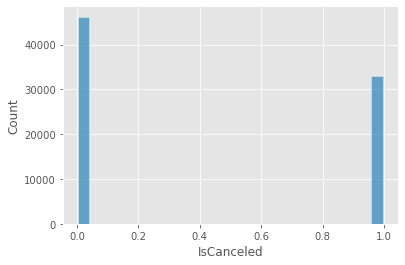

In [6]:
# Variable Objetivo (booking_status)
# ==============================================================================
sns.histplot(data=data, x="IsCanceled", shrink=.8)

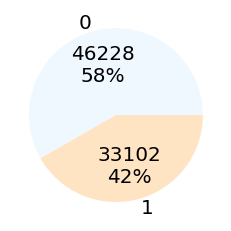

In [7]:
def label_function(val):
    return f'{val / 100 * len(data):.0f}\n{val:.0f}%'

data.groupby('IsCanceled').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},colors=['aliceblue', 'bisque'])
plt.show()

El dataset no se encuentra desbalanceado. Tenemos un 58% de datos de reservas no canceladas y un 42% de reservas canceladas.

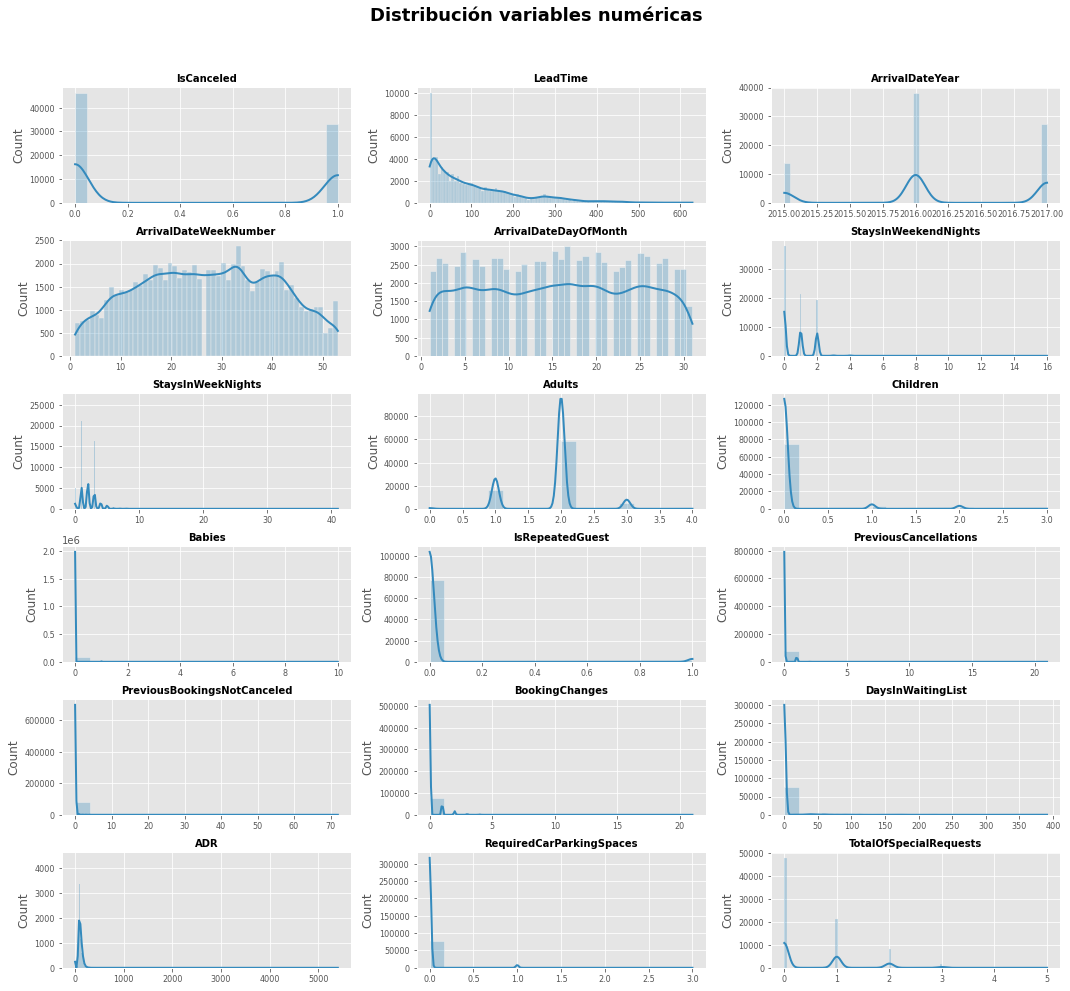

In [8]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(6,3, figsize=(15, 14))
fig.subplots_adjust(top=0.8)
df=data[columnas_numeric]
ax = axes.ravel()                     
for i in range(0,len(columnas_numeric)): 
    sns.histplot(
        data    = df.iloc[:,i],
        stat    = "count",
        kde     = True,
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = ax[i]
    )
    ax[i].set_title(columnas_numeric[i], fontsize = 10, fontweight = "bold")
    ax[i].tick_params(labelsize = 8)
    ax[i].set_xlabel("")

fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 18, fontweight = "bold");

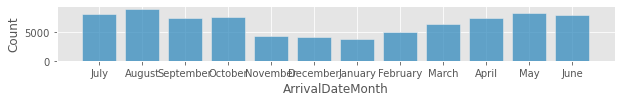

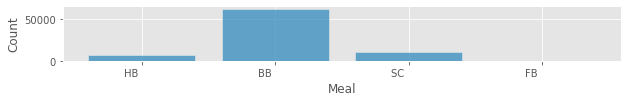

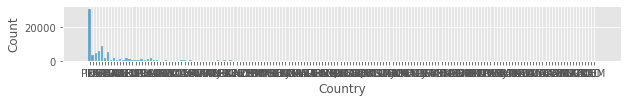

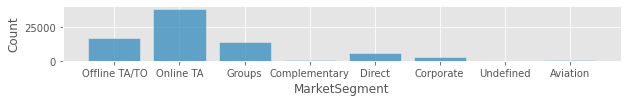

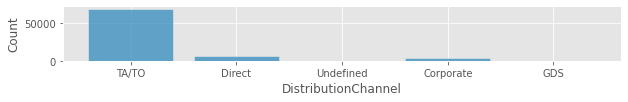

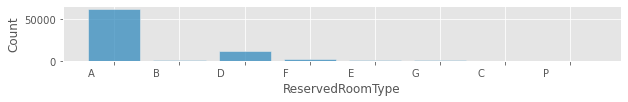

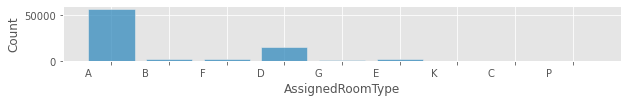

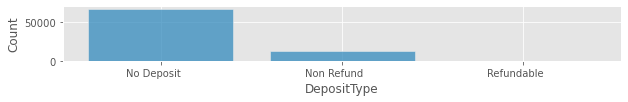

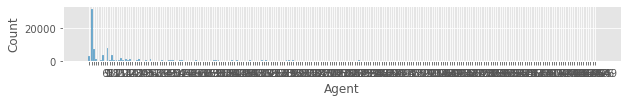

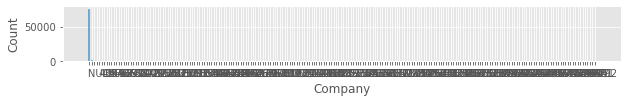

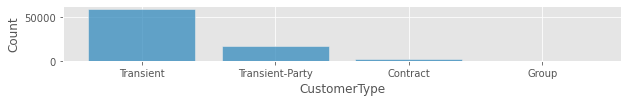

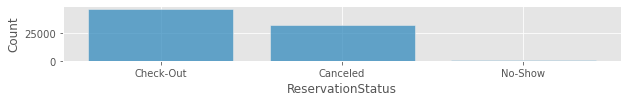

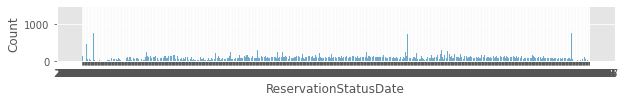

In [9]:
# Distribución de variables categoricas
for column in data[columnas_categoric]:
    plt.figure(figsize=(10,1))
    sns.histplot(data=data, x=column, shrink=.8)

In [10]:
def Remove_Outlier_Indices(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    trueList = ~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))
    return trueList

# Index List of Non-Outliers
nonOutlierList = Remove_Outlier_Indices(data["ADR"])

# Non-Outlier Subset of the Given Dataset
dfSubset = data[nonOutlierList]

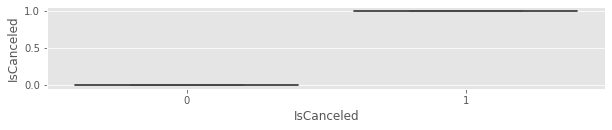

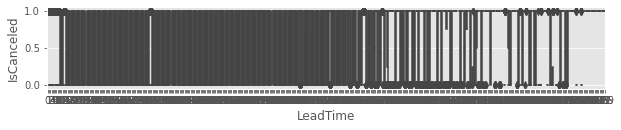

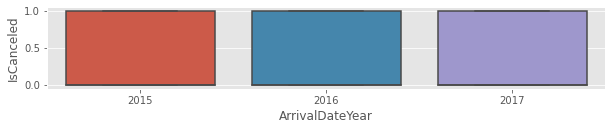

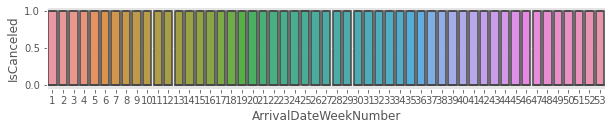

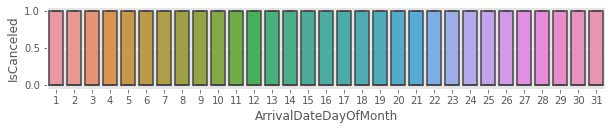

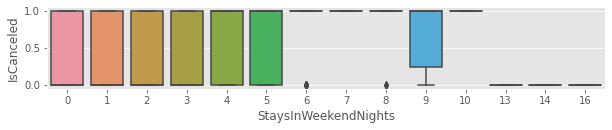

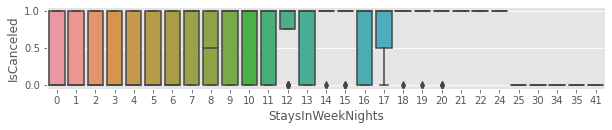

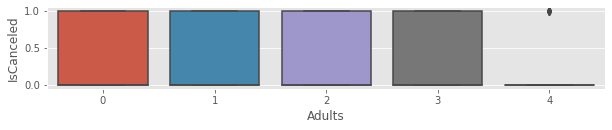

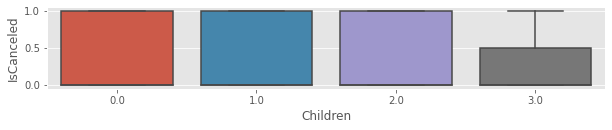

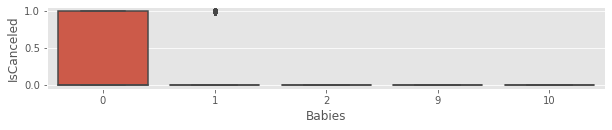

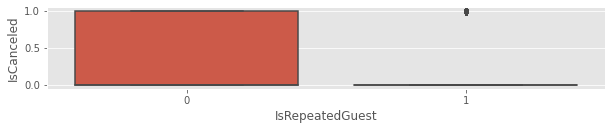

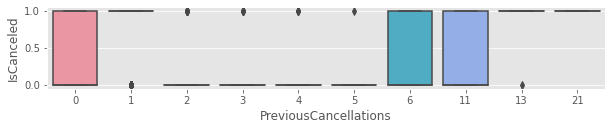

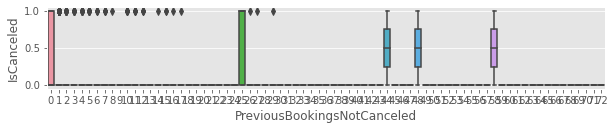

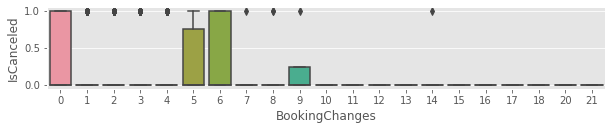

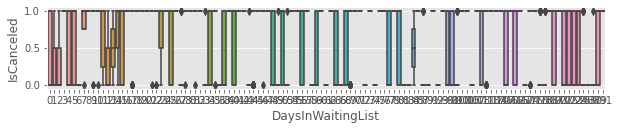

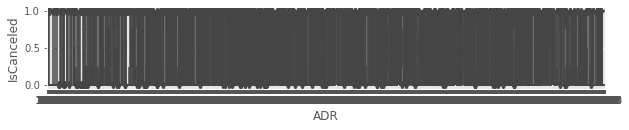

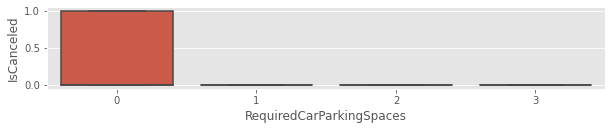

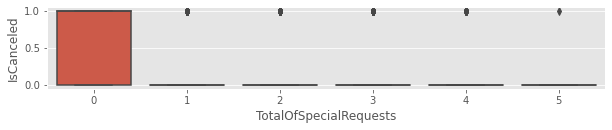

In [11]:
# Boxplots variable dependiente vs variables independientes
# ==============================================================================
for column in data[columnas_numeric]:
    nonOutlierList = Remove_Outlier_Indices(data[column])
    dfSubset = data[nonOutlierList]
    plt.figure(figsize=(10,1.5))
    sns.boxplot(data=data, x=column, y="IsCanceled")

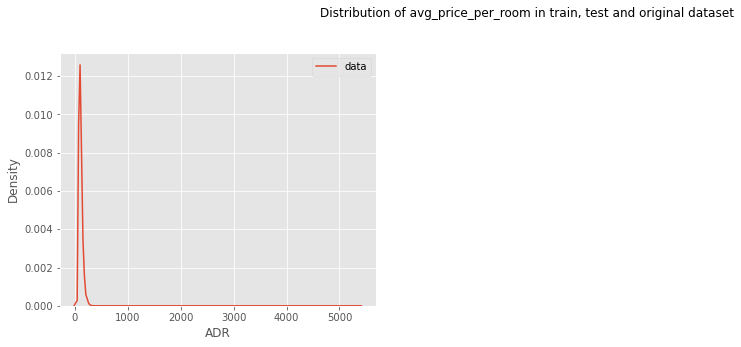

In [12]:
column = 'ADR'
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.kdeplot(data=data, x=column)
plt.legend(['data'])

plt.gcf().suptitle("Distribution of avg_price_per_room in train, test and original dataset")
plt.tight_layout(pad=2)

In [13]:
# creating train_sample for better comparison
def equal_sample_dataset(df, target):
    true = df[df[target] == 1]
    false = df[df[target] == 0].sample(n=len(true))
    
    return pd.concat([true, false])
    
train_sample = equal_sample_dataset(data, 'IsCanceled')

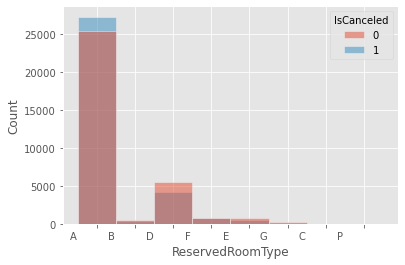

In [14]:
sns.histplot(x=train_sample['ReservedRoomType'], hue=train_sample['IsCanceled'], bins=15);


#### Análisis exploración de los datos para su entendimiento dentro del contexto organizacional
A modo de resumen encontramos qué:
* A pesar de que la cuenta de faltantes inicial indica que apenas hay dos columnas con datos faltantes, se evidencia que son muy pocos vs la realidad en donde desde al inspeccionar columnas como "Agent" y "Company" en el dataset ya nos intuye que hay problemas en el casteo de los datos faltantes. En otras palabras, podemos ver que en estas columnas por ejemplo, hay registros con muchos faltantes, pero, aparecen como variable tipo texto: '       NULL'.
* Adicionalmente, evidenciamos en los tipos de datos que las fechas se están tomando como tipo Texto u object y no Fecha o Datetime.
* De las variables categóricas resaltamos que tenemos dos posibles variables tipo fecha, debemos revisar cuál de ellas nos interesa y como las debemos tratar. Estas variables son ArrivalDateYear, ArrivalDateWeekNumber, ArrivalDateDayOfMonth y ReservationStatusDate.
* El dataset no se encuentra desbalanceado. Tenemos un 58% de datos de reservas no canceladas y un 42% de reservas canceladas. No es necesario aplicar estrategias de balanceo de datos.
* Se encuentran bastantes outliers en varias variables del dataset, es necesario tratarlas para obtener unos mejores resultados.
* Los datos faltantes reales y los datos faltantes casteados como string deben ser tratados e imputados de alguna manera.
* No fue posible realizar la gráfica de correlación ya que aún no se han tratado los datos faltantes, esto lo haremos en la etapa de preparación de datos como entradas para modelos predictivos.
* Se toma la decisión de presci]ndir de la variable "Company" ya que esta corresponde al identificador de la empresa que realizó la reserva y muchos identificadores de estas son anonimos para cuando no se identifica la empresa que realiza la reserva,  adicionalmente esta columna tiene muchos datos nulos.
* Se toma la decisión de eliminar la variable "ArrivalDateWeekNumber" ya que representa la misma información que los demas Arrival* (Day, Month y Year).
* Se toma la decisión de transformar la variable "Agent" teniendo en cuenta que la distribución de esta se agrupa en un 40% para el agente 9, un 10 en null que significa que fue una reserva por un canal digital y el resto en otros agentes. La transformación entonces consta de conservar el agente 9 y denominarlo "SuperAgente", null sería "CanalDigital" y el resto sería "OtrosAgentes".

##### RETROALIMENTACION EDA:

Comentarios sobre la exploración de los datos para su entendimiento dentro del contexto organizacional: Se utilizan histogramas, correlogramas y estadísticas descriptivas para la exploración preliminar de los datos del problema, para dejar claro el rol que cumple cada una de las variables a utilizar dentro del contexto organizacional en cuestión. Además, se argumenta la razón por la que el uso de estas variables puede contribuir a la solución del problema por medio de modelos predictivos.

Faltó en esta sección la descripción en palabras de cada variable, pese a que los nombre son dicientes. Por ejemplo, ¿country es el país de origen del usuario que hace la reserva? ¿Qué es ADR?

Entiendo que es la información disponible, pero valdría la pena al momento de la discusión comentar qué tan significativo puede ser para otros hoteles o apps de reservas, el modelo construido con estos datos de 2015 a 2017 en un hotel particular. ¿Creen que la metodología puede ser replicable? Importante que resalten la contribución en la entrega final.

Bien lo de los NULL en Agent y Company.

Para los diagramas de caja, sería bueno quitar los datos atípicos de forma que se puedan ver mejor. En los presentados en el documento poco se puede apreciar, pero esto no necesariamente quiere decir que no podemos sacar información relevante a a partir de ellos.

### 3. Preparación de los datos para poder utilizarlos como entrada para modelos predictivos. 

Preparación de los datos para poder utilizarlos como entrada para modelos predictivos: Se utilizan correctamente los procedimientos de preprocesamiento de datos vistos en el curso para la preparación de los datos antes de la implementación de los modelos predictivos.

Iniciemos eliminado las variables "Company" y "ArrivalDateWeekNumber". 

In [15]:
data.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateMonth,ArrivalDateWeekNumber,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,...,DepositType,Agent,Company,DaysInWaitingList,CustomerType,ADR,RequiredCarParkingSpaces,TotalOfSpecialRequests,ReservationStatus,ReservationStatusDate
0,0,6,2015,July,27,1,0,2,1,0.0,...,No Deposit,6,NULL,0,Transient,0.00,0,0,Check-Out,2015-07-03
1,1,88,2015,July,27,1,0,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-07-01
2,1,65,2015,July,27,1,0,4,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,1,Canceled,2015-04-30
3,1,92,2015,July,27,1,2,4,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,2,Canceled,2015-06-23
4,1,100,2015,July,27,2,0,2,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-04-02
5,1,79,2015,July,27,2,0,3,2,0.0,...,No Deposit,9,NULL,0,Transient,76.50,0,1,Canceled,2015-06-25
6,0,3,2015,July,27,2,0,3,1,0.0,...,No Deposit,1,NULL,0,Transient-Party,58.67,0,0,Check-Out,2015-07-05
7,1,63,2015,July,27,2,1,3,1,0.0,...,No Deposit,9,NULL,0,Transient,68.00,0,0,Canceled,2015-06-25
8,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02
9,1,62,2015,July,27,2,2,3,2,0.0,...,No Deposit,8,NULL,0,Transient,76.50,0,1,No-Show,2015-07-02


In [16]:
del data['Company']
del data['ArrivalDateWeekNumber']

Ahora transformemos la variable "Agent" tal y como se especificó en el análisis del punto anterior.

In [17]:
def agent_transform(x):
    if x.strip() == 'NULL':
        return "CanalDigital"
    elif x.strip() == '9':
        return "SuperAgente"
    else:
        return "OtrosAgentes"
        
data["Agent"] = data["Agent"].apply(lambda x: agent_transform(x))
data["Agent"].value_counts()

OtrosAgentes    39244
SuperAgente     31955
CanalDigital     8131
Name: Agent, dtype: int64

    Se toma la decisión de eliminar las filas con datos faltantes en el dataset. Esto puede aumentar la variabilidad sin embargo se considera que al solo eliminar 28 registros; en ocasión que se cuenta con suficientes datos para que el modelo aprenda a generalizar.

In [18]:
# Elimina registros nulos
data.dropna(axis=0, inplace = True)
data.shape

(79302, 29)

Validar duplicados

In [19]:
len(data)-len(data.drop_duplicates())

25891

Bajo nuestro criterio consideramos que 25.894 registros duplicados es demasiado considerando que los datos son de 2 años y 1 mes es decir, apróximadamente 758 días. Para tener tantos duplicados tiene que ser que en promedio por día hubiesen aproximadamente 34 duplicados por día, y, teniendo en cuenta que esto es de un sólo hotel y que hay variables como lead time que tienen una baja probabilidad de coincidir entre otras, creemos que se tratan de duplicados generados por error en la recolección de datos. 

Por lo anterior, vamos a proceder a eliminar los registros duplicados.

In [20]:
data = data.drop_duplicates()
data.shape

(53411, 29)

También se decide eliminar las variables ReservationStatusDate y ReservationStatus ya que la variable reservationStatus se podría calcular de IsCanceled, al menos parcialmente tal y como sucedía en los casos anteriores revisados en este curso con las variables Today y Direction.

In [21]:
del data["ReservationStatusDate"]
del data["ReservationStatus"]

Adicionalmente, decidimos transformar la variable country ya que tiene muchas categorias y decidimos hacer algo similar a lo de Agent en donde conservaremos únicamente la categoría "PRT" o puerto rico y lo demás lo consideraremos como "OTRO".

In [22]:
data["Country"] = data["Country"].apply(lambda x: x if x.strip() == 'PRT' else "OTRO")
data["Country"].value_counts()

OTRO    40203
PRT     13208
Name: Country, dtype: int64

In [23]:
len(data.columns)

27

Por último convertimos a dummies las variables categóricas y tomaremos la variable ArrivalDateMonth como númerica.

In [24]:
#data["ArrivalDateMonth"] = data["ArrivalDateMonth"].astype(str)
data = pd.get_dummies(data, columns = ["ArrivalDateMonth","Meal", "Country", "MarketSegment", "DistributionChannel", "ReservedRoomType", "AssignedRoomType", "DepositType", "Agent", "CustomerType"], drop_first = True)

Y revisamos las correlaciones de las variables que quedan.

In [25]:
columnas_numeric = data.select_dtypes(include=['float64', 'int64']).columns.to_list()
columnas_categoric = data.select_dtypes(exclude=['float64', 'int64']).columns.to_list()

# Correlación
# =============================================================================
#nominal.associations(data,figsize=(36,36),mark_columns=True, cmap = 'bwr')

#Calculando VIF para cada featiure
# =============================================================================
vif_data = pd.DataFrame()
vif_data["feature"] = data[columnas_numeric].columns
 
vif_data["VIF"] = [variance_inflation_factor(data[columnas_numeric].values, i)
                          for i in range(len(data[columnas_numeric].columns))]
  
print(vif_data)

                        feature        VIF
0                    IsCanceled   1.610573
1                      LeadTime   2.165335
2               ArrivalDateYear  21.292688
3         ArrivalDateDayOfMonth   4.213317
4          StaysInWeekendNights   2.135429
5             StaysInWeekNights   3.426057
6                        Adults  15.782986
7                      Children   1.237120
8                        Babies   1.015208
9               IsRepeatedGuest   1.481984
10        PreviousCancellations   1.370791
11  PreviousBookingsNotCanceled   1.616177
12               BookingChanges   1.163854
13            DaysInWaitingList   1.044756
14                          ADR   8.206099
15     RequiredCarParkingSpaces   1.072035
16       TotalOfSpecialRequests   1.873907


##### RETROALIMENTACION PREPARACION DE DATOS:

Comentarios sobre la preparación de los datos para poder utilizarlos como entrada en modelos predictivos: Se utilizan correctamente los procedimientos de preprocesamiento de datos vistos en el curso para la preparación de los datos antes de la implementación de los modelos predictivos.

Es un supuesto grande el de los duplicados, pero está bien justificado.

Ojo que no están "imputando mediante la eliminación de datos", simplemente están eliminado. La palabra imputar no iría en este caso.

Quedó pendiente el análisis del gráfico de correlación, pero va bien el proceso de preparación de datos hasta el momento. 

## MODELOS DE CLASIFICACIÓN##

In [26]:
# Preprocesado y modelado
# ==============================================================================
import sklearn
from sklearn import datasets
#print(sklearn.__version__)
from scipy import stats
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.cross_decomposition import PLSRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
from sklearn.metrics import ConfusionMatrixDisplay
#from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# metrics
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
# models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay



# model selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_validate, cross_val_score
from sklearn.model_selection import StratifiedKFold, RepeatedStratifiedKFold
#import optuna




In [27]:
data.head(10)

,IsCanceled,LeadTime,ArrivalDateYear,ArrivalDateDayOfMonth,StaysInWeekendNights,StaysInWeekNights,Adults,Children,Babies,IsRepeatedGuest,...,AssignedRoomType_G,AssignedRoomType_K,AssignedRoomType_P,DepositType_Non Refund,DepositType_Refundable,Agent_OtrosAgentes,Agent_SuperAgente,CustomerType_Group,CustomerType_Transient,CustomerType_Transient-Party
0,0,6,2015,1,0,2,1,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
1,1,88,2015,1,0,4,2,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,1,65,2015,1,0,4,1,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,92,2015,1,2,4,2,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,100,2015,2,0,2,2,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
5,1,79,2015,2,0,3,2,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
6,0,3,2015,2,0,3,1,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1
7,1,63,2015,2,1,3,1,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
8,1,62,2015,2,2,3,2,0.0,0,0,...,0,0,0,0,0,1,0,0,1,0
10,0,43,2015,3,0,2,2,0.0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [28]:
#Main
#dummies= CrearVariablesDummies(data,features_categoricas)
#final_hitters_data = pd.concat([data[features_numericas], data["IsCanceled"],dummies], axis=1)
features = [x for x in data.columns if x != "IsCanceled"]
XTotal= data[features]
yTotal= data["IsCanceled"]

XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="IsCanceled"), data["IsCanceled"], test_size=0.33, random_state=0)

In [29]:
print(XTrain.shape)
print(XTest.shape)
print(yTrain.shape)
print(yTest.shape)

(35785, 62)
(17626, 62)
(35785,)
(17626,)


In [30]:
yTest.head()

78459    0
70958    0
79326    0
53798    0
38513    0
Name: IsCanceled, dtype: int64

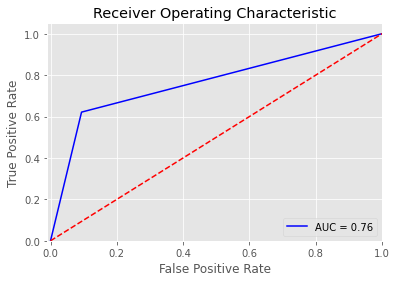

El  MSE del Random Forest incluyendo todas las varaibles es 0.7638857512344517


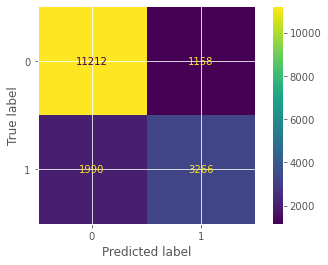

In [31]:

#XTrain, XTest, yTrain, yTest = train_test_split(data.drop(columns="IsCanceled"), data["IsCanceled"], test_size=0.33, random_state=0)

clfRF = RandomForestClassifier(random_state=0)
clfRF.fit(XTrain, yTrain)

prediccionRF=clfRF.predict(XTest)
#prediccionRF=clfRF.predict_proba(XTest)[:,0]
fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionRF, pos_label=1)
AUCRF_model1=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUCRF_model1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print(f'El  MSE del Random Forest incluyendo todas las varaibles es {AUCRF_model1}')
yPred_RF= clfRF.predict(XTest)
cm = confusion_matrix(yTest, yPred_RF, labels=clfRF.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clfRF.classes_)
disp.plot()
plt.show()

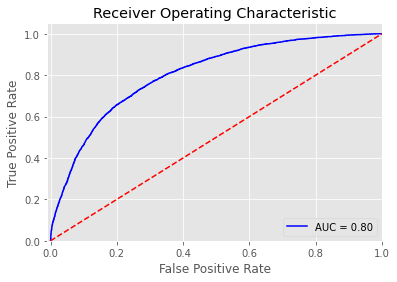

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.svm import SVC
from sklearn import metrics

from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import RFE
clf = SVC(kernel='linear',probability=True)
clf.fit(XTrain, yTrain)
predicciones=clf.predict(XTest)
prediccionesProb=clf.predict_proba(XTest)

fpr, tpr, thresholds = metrics.roc_curve(yTest, prediccionesProb[:,1], pos_label=1)
AUC_lineal=metrics.auc(fpr, tpr)
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % AUC_lineal)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.01, 1])
plt.ylim([0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
def stratified_cross_val_score(model, X, y, n_repeats=3, n_splits=10):
    cv = RepeatedStratifiedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=1)
    history = cross_validate(model, X, y, scoring='roc_auc', return_train_score=True, n_jobs=-1, cv=cv)
    return history['train_score'].mean(), history['test_score'].mean(), history['fit_time'].mean()

In [34]:
Modelos = {
    "LogisticRegression" : LogisticRegression(random_state=0,max_iter=10000),
    "KNN" : KNeighborsClassifier(),
#     svc takes too much time
#     "SVC" : SVC(random_state=0), 
    "RandomForest" : RandomForestClassifier(random_state=0),
    #"XGBoost" : XGBClassifier(random_state=0, tree_method='gpu_hist'),
    "LDA" : LinearDiscriminantAnalysis(),
    "QDA" : QuadraticDiscriminantAnalysis(),
    "NBC": GaussianNB(),
    "ArbolDecision":DecisionTreeClassifier(),
    "Bagging":BaggingClassifier(n_estimators=10, random_state=0),
    "GradienBoosting":GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0)
}

In [35]:
model_scores_default = pd.DataFrame({"Modelos": Modelos.keys(), "mean_training_score": np.zeros(len(Modelos)),
                             'mean_validation_score': np.zeros(len(Modelos)), 
                            'mean_train_time': np.zeros(len(Modelos))})

index = 0
for model_name, model in Modelos.items():
    print(model_name)
# i used n_repeats=3 and n_splits=10 to compare models
    train_mean, valid_mean, mean_time = stratified_cross_val_score(model, XTrain, yTrain, n_repeats=1, n_splits=3)
    model_scores_default.loc[index, 'mean_training_score']= train_mean
    model_scores_default.loc[index, 'mean_validation_score']= valid_mean
    model_scores_default.loc[index, 'mean_train_time']= mean_time
    index += 1

LogisticRegression
KNN
RandomForest
LDA
QDA
NBC
ArbolDecision
Bagging
GradienBoosting


In [36]:
model_scores_default

,Modelos,mean_training_score,mean_validation_score,mean_train_time
0,LogisticRegression,0.824835,0.823471,17.024976
1,KNN,NaN,NaN,0.045910
2,RandomForest,0.999977,0.880747,4.965965
3,LDA,0.821784,0.820478,0.402802
4,QDA,0.813453,0.808671,0.395531
5,NBC,0.737271,0.735012,0.093494
6,ArbolDecision,0.999990,0.718297,0.424270
7,Bagging,0.999131,0.851976,2.264642
8,GradienBoosting,0.849417,0.844996,2.745859


In [37]:
def make_predictions(model, X, y, X_test, threshold=0.905, n_repeats=3, n_splits=10):
    skfold = RepeatedStratifiedKFold(n_repeats=n_repeats, n_splits=n_splits)
    _model = model
    test_preds = []
    valid_scores = []
    for i, (train_index, valid_index) in enumerate(skfold.split(X, y)):
        x_train, x_valid = X.iloc[train_index], X.iloc[valid_index]
        y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
        _model.fit(x_train, y_train)
        val_preds = _model.predict_proba(x_valid)[:, 1]
        val_score = roc_auc_score(y_valid, val_preds)
        
        if val_score > threshold:
            print(f"Fold {i} validation score : {val_score}")
            _model_train_preds = _model.predict_proba(x_train)[:, 1]
            _model_valid_preds = _model.predict_proba(x_valid)[:, 1]
            _model_test_preds = _model.predict_proba(XTest)[:, 1]
            
            valid_scores.append(val_score)
            test_preds.append(_model_test_preds)
    test_preds = np.array(test_preds)
    test_preds_final = test_preds.sum(axis=0) / len(test_preds)
    mean_valid_score = np.mean(valid_scores)
    return test_preds_final, mean_valid_score

In [38]:
seed = 0
# for random forest
print("randomforest")
model = RandomForestClassifier(random_state=seed)
rf_crossval_test_preds, rf_valid_score = make_predictions(model, XTrain, yTrain, XTest, threshold=0.5)
print(f"Mean valid_score: {rf_valid_score}", end='\n\n')


randomforest
Fold 0 validation score : 0.8860179490355992
Fold 1 validation score : 0.8842565014810404
Fold 2 validation score : 0.8820014828544948
Fold 3 validation score : 0.8832044485634848
Fold 4 validation score : 0.8807423540315107
Fold 5 validation score : 0.8819534322820038
Fold 6 validation score : 0.8790415584415584
Fold 7 validation score : 0.8838217068645641
Fold 8 validation score : 0.8882434137291281
Fold 9 validation score : 0.8870270871985159
Fold 10 validation score : 0.8902190515259573
Fold 11 validation score : 0.8755659146360009
Fold 12 validation score : 0.887483781278962
Fold 13 validation score : 0.8853264133456905
Fold 14 validation score : 0.8819317886932344
Fold 15 validation score : 0.8823282003710575
Fold 16 validation score : 0.8752146567717997
Fold 17 validation score : 0.8831150278293136
Fold 18 validation score : 0.887808348794063
Fold 19 validation score : 0.8805280148423006
Fold 20 validation score : 0.8851431598047237
Fold 21 validation score : 0.8908

In [40]:
seed = 0
# for random forest
print("LogisticRegression")
model = LogisticRegression(random_state=seed,max_iter=10000)
rf_crossval_test_preds, rf_valid_score = make_predictions(model, XTrain, yTrain, XTest, threshold=0.5)
print(f"Mean valid_score: {rf_valid_score}", end='\n\n')

LogisticRegression
Fold 0 validation score : 0.8286325543993904
Fold 1 validation score : 0.8328533150747122
Fold 2 validation score : 0.8105592215013901
Fold 3 validation score : 0.815098609823911
Fold 4 validation score : 0.8207075069508805
Fold 5 validation score : 0.8137291280148422
Fold 6 validation score : 0.823852133580705
Fold 7 validation score : 0.8310667903525046
Fold 8 validation score : 0.8280068645640074
Fold 9 validation score : 0.8231755102040815
Fold 10 validation score : 0.8279050161011661
Fold 11 validation score : 0.8250631101919158
Fold 12 validation score : 0.8112939759036144
Fold 13 validation score : 0.8144481927710844
Fold 14 validation score : 0.8246630213160334
Fold 15 validation score : 0.8284020408163266
Fold 16 validation score : 0.8255137291280149
Fold 17 validation score : 0.811821892393321
Fold 18 validation score : 0.8290536178107607
Fold 19 validation score : 0.8274070500927644
Fold 20 validation score : 0.8274502814829541
Fold 21 validation score : 0

In [41]:
seed = 0
# for random forest
print("Bagging")
model = BaggingClassifier(n_estimators=10, random_state=seed)
rf_crossval_test_preds, rf_valid_score = make_predictions(model, XTrain, yTrain, XTest, threshold=0.0879)
print(f"Mean valid_score: {rf_valid_score}", end='\n\n')

Bagging
Fold 0 validation score : 0.8421416220153869
Fold 1 validation score : 0.8584161882556811
Fold 2 validation score : 0.8502598702502318
Fold 3 validation score : 0.8561419833178869
Fold 4 validation score : 0.8631343836886005
Fold 5 validation score : 0.8553300556586272
Fold 6 validation score : 0.855125974025974
Fold 7 validation score : 0.8575153988868275
Fold 8 validation score : 0.858982745825603
Fold 9 validation score : 0.8523820037105752
Fold 10 validation score : 0.8521224163395866
Fold 11 validation score : 0.8640065309683176
Fold 12 validation score : 0.8599193697868397
Fold 13 validation score : 0.8554396663577386
Fold 14 validation score : 0.8606676552363299
Fold 15 validation score : 0.8608925788497217
Fold 16 validation score : 0.8520141001855287
Fold 17 validation score : 0.8517343228200371
Fold 18 validation score : 0.8575543599257884
Fold 19 validation score : 0.8603257884972171
Fold 20 validation score : 0.864309934653226
Fold 21 validation score : 0.8608211631

In [42]:
DecisionTreeClassifier()
print("Tree")
model = DecisionTreeClassifier()
rf_crossval_test_preds, rf_valid_score = make_predictions(model, XTrain, yTrain, XTest, threshold=0.0879)
print(f"Mean valid_score: {rf_valid_score}", end='\n\n')


Tree
Fold 0 validation score : 0.7228605774758742
Fold 1 validation score : 0.7227949265562792
Fold 2 validation score : 0.712501390176089
Fold 3 validation score : 0.7223262279888786
Fold 4 validation score : 0.7202704355885078
Fold 5 validation score : 0.7245931354359926
Fold 6 validation score : 0.7271474953617811
Fold 7 validation score : 0.7196497217068646
Fold 8 validation score : 0.7166792207792207
Fold 9 validation score : 0.7304111317254175
Fold 10 validation score : 0.7150980053247717
Fold 11 validation score : 0.7264773126000065
Fold 12 validation score : 0.7294444856348471
Fold 13 validation score : 0.7251760889712697
Fold 14 validation score : 0.7339108433734939
Fold 15 validation score : 0.7146079777365493
Fold 16 validation score : 0.7342335807050093
Fold 17 validation score : 0.7294677179962895
Fold 18 validation score : 0.7221513914656772
Fold 19 validation score : 0.7151385899814472
Fold 20 validation score : 0.7281080146791005
Fold 21 validation score : 0.71628380187

In [43]:
def Metricas(_modelo,yTest, yPred,yPred_Prob)->tuple:
    acc= accuracy_score(yTest, yPred)
    prec=precision_score(yTest, yPred, average='weighted')
    cm = confusion_matrix(yTest, yPred, labels=_modelo.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=_modelo.classes_)
    disp.plot()
    plt.show()
    auc = metrics.roc_auc_score(yTest,yPred_Prob[:,1])
    sensi = recall_score(y_true=yTest, y_pred = yPred, pos_label=1)
    especifi = cm[0][0] / (cm[0][0] + cm[0][1])
    return( acc, prec,auc,sensi,especifi)

def Model(model,XTrain,XTest, yTrain, yTest)->tuple:
    _modelo= model
    _modelo.fit(XTrain, yTrain)
    y_pred= _modelo.predict(XTest)
    y_pred_prob= _modelo.predict_proba(XTest)
    return((_modelo, y_pred,y_pred_prob)) 

Modelos2 = {
    "LogisticRegression" : LogisticRegression(random_state=0,max_iter=10000),
#    "KNN" : KNeighborsClassifier(),
#     svc takes too much time
#     "SVC" : SVC(random_state=0), 
    "RandomForest" : RandomForestClassifier(random_state=0),
    #"XGBoost" : XGBClassifier(random_state=0, tree_method='gpu_hist'),
    "LDA" : LinearDiscriminantAnalysis(),
    "QDA" : QuadraticDiscriminantAnalysis(),
    "NBC": GaussianNB(),
    "ArbolDecision":DecisionTreeClassifier(),
    "Bagging":BaggingClassifier(n_estimators=10, random_state=0),
    "GradienBoosting":GradientBoostingClassifier(learning_rate=1.0,max_depth=1,random_state=0)
}

LogisticRegression


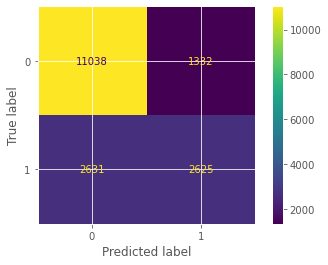

RandomForest


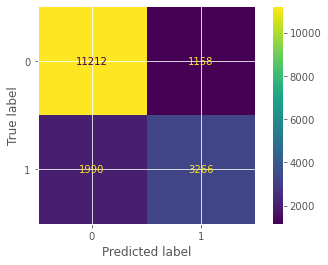

LDA


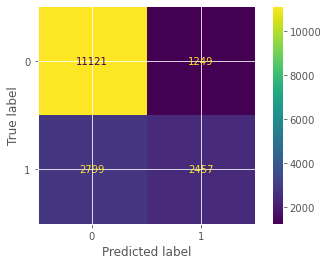

QDA


C:\Users\camab\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


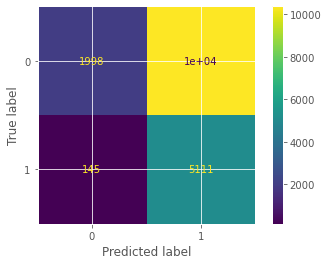

NBC


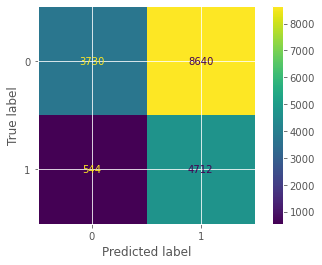

ArbolDecision


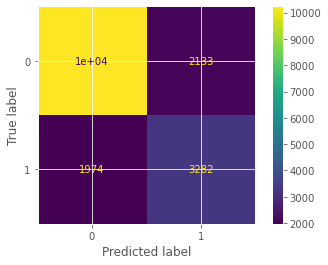

Bagging


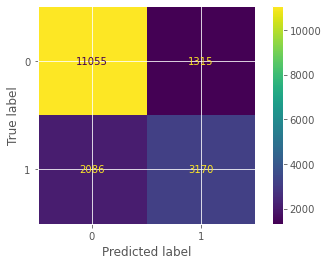

GradienBoosting


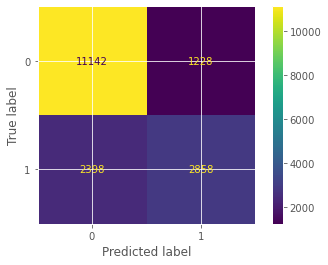

In [44]:
model_scores_default2 = pd.DataFrame({"Modelos": Modelos2.keys(), "accModelo": np.zeros(len(Modelos2)),
                             'precModelo': np.zeros(len(Modelos2)), 
                            'aucNBC': np.zeros(len(Modelos2)),'sensi': np.zeros(len(Modelos2)), 
                                      'especi': np.zeros(len(Modelos2)), })

index = 0
for model_name, model in Modelos2.items():
    print(model_name)
# i used n_repeats=3 and n_splits=10 to compare models
    (_modelo, yPred,yPred_Prob)= Model(model,XTrain, XTest, yTrain, yTest)
    (accNBC,precNBC,aucNBC,sensi,especifi)= Metricas(_modelo,yTest,yPred,yPred_Prob)
    model_scores_default2.loc[index, 'accModelo']= accNBC
    model_scores_default2.loc[index, 'precModelo']= precNBC
    model_scores_default2.loc[index, 'aucNBC']= aucNBC
    model_scores_default2.loc[index, 'sensi']= sensi
    model_scores_default2.loc[index, 'especi']= especifi
    index += 1

In [45]:
model_scores_default2

,Modelos,accModelo,precModelo,aucNBC,sensi,especi
0,LogisticRegression,0.775162,0.764539,0.824286,0.499429,0.892320
1,RandomForest,0.821400,0.816160,0.886030,0.621385,0.906386
2,LDA,0.770339,0.758385,0.821637,0.467466,0.899030
3,QDA,0.403325,0.752754,0.614347,0.972412,0.161520
4,NBC,0.478952,0.717713,0.733466,0.896499,0.301536
5,ArbolDecision,0.766992,0.769087,0.727205,0.624429,0.827567
6,Bagging,0.807046,0.801165,0.858976,0.603120,0.893694
7,GradienBoosting,0.794281,0.786088,0.846435,0.543760,0.900728


In [ ]:
estimator = SVC(kernel='linear',probability=True)  #se usa SVC como el algoritmo predictivo
selector = RFE(estimator, n_features_to_select=10, step=1) #Se define step=1, pero lo puede cambiar para que sea más rápido
selector = selector.fit(XTrain, yTrain) # esto puede tardar algunos minutos

VARIABLES_ENVOLTURA = selector.support_  #Conjunto de variables seleccionadas
print('Número de predictores seleccionados :', selector.n_features_)
print(f'Features seleccionados : {list( XTotal.columns[selector.support_])}')
features_seleccionadas = pd.DataFrame(selector.transform(XTotal), columns= XTotal.columns[selector.support_])